In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

from Bio.PopGen.GenePop import Controller as gpc

%matplotlib inline

In [2]:
ctrl = gpc.GenePopController()
my_pops = [l.rstrip() for l in open('hapmap10_auto_noofs_2.pops')]
num_pops = len(my_pops)
pop_iter, loci_iter = ctrl.calc_allele_genotype_freqs('hapmap10_auto_noofs_2.gp')

In [3]:
num_pops = len(my_pops)
fix_pops = [0 for i in range(num_pops)]
num_reads = [defaultdict(int) for i in range(num_pops)]
num_buckets = 20
MAFs = []
for i in range(num_pops):
    MAFs.append([0] * num_buckets)
for locus_data in loci_iter:
    locus_name = locus_data[0]
    allele_list = locus_data[1]
    pop_of_loci = locus_data[2]
    for i in range(num_pops):
        locus_num_reads = pop_of_loci[i][2]
        num_reads[i][locus_num_reads] += 1
        maf = min(pop_of_loci[i][1])
        if maf == 0:
            fix_pops[i] += 1
        else:
            bucket = min([num_buckets - 1, int(maf * 2 * num_buckets)])
            MAFs[i][bucket] += 1

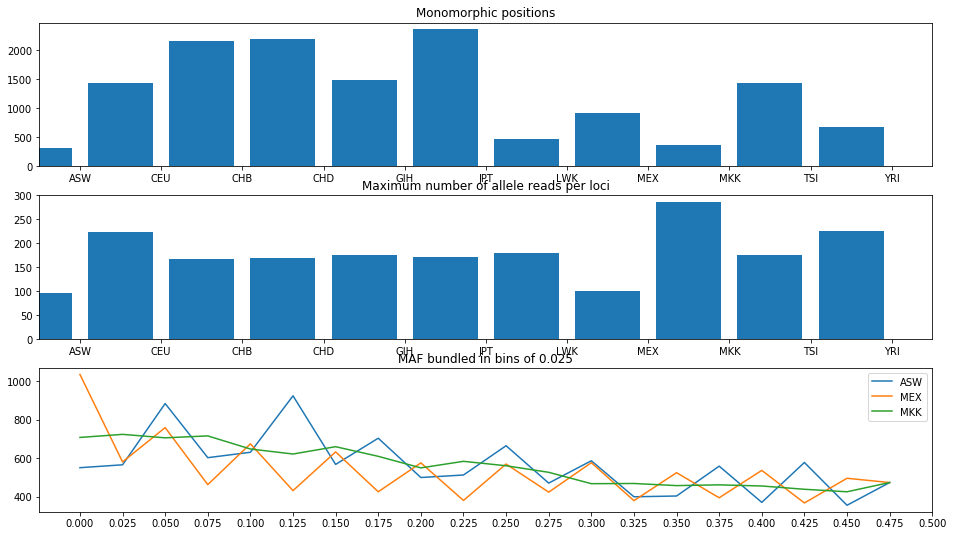

In [4]:
fig, axs = plt.subplots(3, figsize=(16, 9), squeeze=False)
axs[0, 0].bar(range(num_pops), fix_pops)
axs[0, 0].set_xlim(0, 11)
axs[0, 0].set_xticks(0.5 + np.arange(num_pops))
axs[0, 0].set_xticklabels(my_pops)
axs[0, 0].set_title('Monomorphic positions')

axs[1, 0].bar(range(num_pops), [np.max(list(vals.keys())) for vals in num_reads])
axs[1, 0].set_xlim(0, 11)
axs[1, 0].set_xticks(0.5 + np.arange(num_pops))
axs[1, 0].set_xticklabels(my_pops)
axs[1, 0].set_title('Maximum number of allele reads per loci')

for pop in [0, 7, 8]:
    axs[2, 0].plot(MAFs[pop], label=my_pops[pop])
axs[2, 0].legend()
axs[2, 0].set_xticks(range(num_buckets + 1))
axs[2, 0].set_xticklabels(['%.3f' % (x / (num_buckets * 2.)) for x in range(num_buckets + 1)])
axs[2, 0].set_title('MAF bundled in bins of 0.025')
None

In [5]:
#for pop_data in pop_iter:
#    pop_name, allele = pop_data
#    print(pop_name)
#    for locus_name, vals in allele.items():
#        geno_list, heterozygosity, allele_cnts, summary = vals
#        print(locus_name, vals)
#        break
#    break

In [6]:
exp_hes = []
for pop_data in pop_iter:
    pop_name, allele = pop_data
    print(pop_name)
    exp_vals = []
    for locus_name, vals in allele.items():
        geno_list, heterozygosity, allele_cnts, summary = vals
        cexp_ho, cobs_ho, cexp_he, cobs_he = heterozygosity
        exp_vals.append(cexp_he / (cexp_he + cexp_ho))
    exp_hes.append(exp_vals)

2446/NA20127
1375/NA12264
NA18594/NA18594
NA18140/NA18140
NA20881/NA20881
NA19007/NA19007
NA19372/NA19372
M005/NA19652
2581/NA21371
NA20757/NA20757
Y105/NA19099


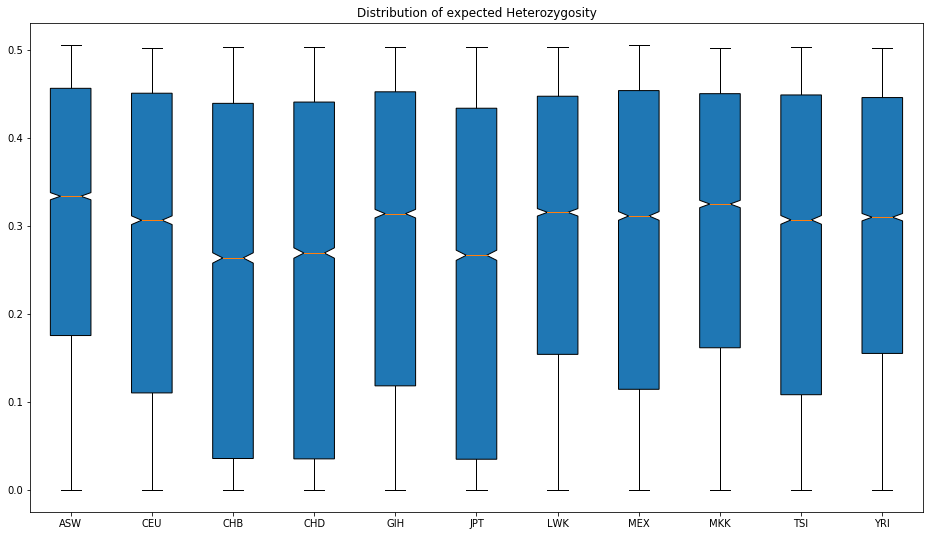

In [9]:
#XXX correct this
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
bplot = ax.boxplot(exp_hes, notch=True, patch_artist=True)
#print(bplot.keys())
#bplot['boxes'][0].set_facecolor('red')
#bplot['boxes'][0].set_edgecolor('red')
ax.set_title('Distribution of expected Heterozygosity')
ax.set_xticks(1 + np.arange(num_pops))
ax.set_xticklabels(my_pops)
None